In [26]:
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
eval_results = json.load(open('evaluation_results.json'))
eval_results

{'llama3_clsit': {'yes': {'creative_writing': {'BLEU': 0.008433782850455936,
    'METEOR': {'meteor': 0.03682534393060151},
    'ChrF': 8.182448385301576,
    'ROUGE': {'rouge1': 0.04726582940868655,
     'rouge2': 0.024999999999999998,
     'rougeL': 0.04622416274201989,
     'rougeLsum': 0.04844164456233423},
    'BERTScore': 0.6412956088781356},
   'brainstorming': {'BLEU': 0.04155194005794957,
    'METEOR': {'meteor': 0.056791930586056874},
    'ChrF': 9.538909929021528,
    'ROUGE': {'rouge1': 0.06037078078234603,
     'rouge2': 0.027713650074938388,
     'rougeL': 0.058944207674607445,
     'rougeLsum': 0.06000544238606671},
    'BERTScore': 0.7047760557869206},
   'multiple_choice': {'BLEU': 0.035469445504039986,
    'METEOR': {'meteor': 0.07735515297738876},
    'ChrF': 9.894996295539697,
    'ROUGE': {'rouge1': 0.10491149235653394,
     'rouge2': 0.028403689399708186,
     'rougeL': 0.09866354912730241,
     'rougeLsum': 0.09861894767866909},
    'BERTScore': 0.703646980745847

In [65]:
def plot_bert_scores(eval_results, model_name):
    sns.set_theme(style="dark")
    sns.set_context("paper")

    pallete = sns.color_palette("viridis", n_colors=2)

    all_bert_scores = []
    for model in eval_results[model_name]:
        for task in eval_results[model_name][model]:
            for metric in eval_results[model_name][model][task]:
                if metric == "BERTScore":
                    all_bert_scores.append({"task": task, "BERTScore": eval_results[model_name][model][task][metric], "model": model})

    all_bert_scores_df = pd.DataFrame(all_bert_scores)

    # Sort tasks by alphabetical order
    all_bert_scores_df = all_bert_scores_df.sort_values("task")

    sns.barplot(x="task", y="BERTScore", hue="model", data=all_bert_scores_df, palette=pallete)

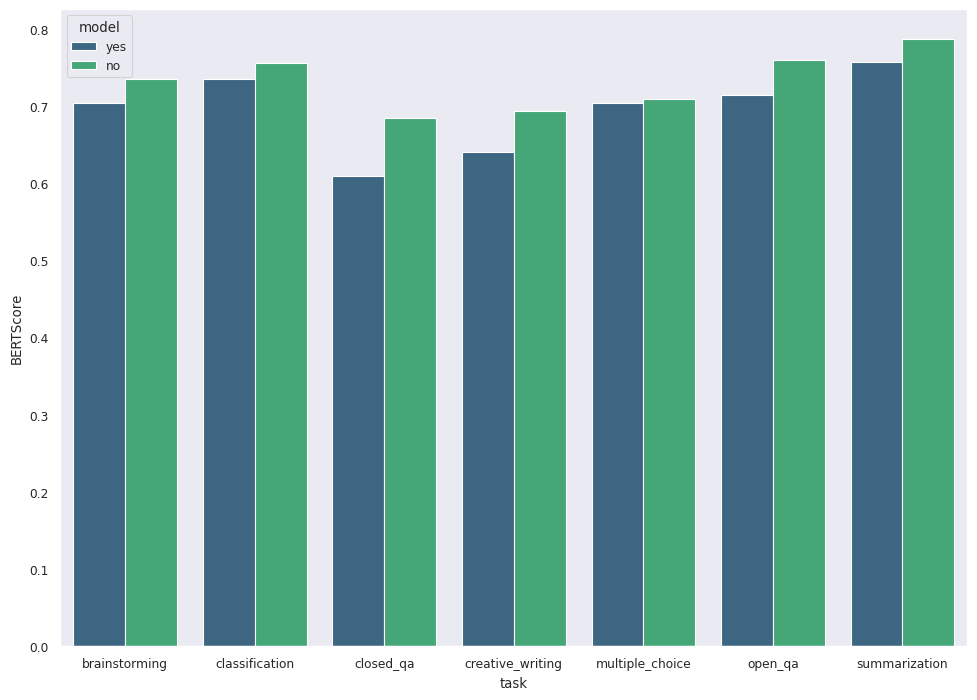

In [66]:
plot_bert_scores(eval_results, "llama3_clsit")

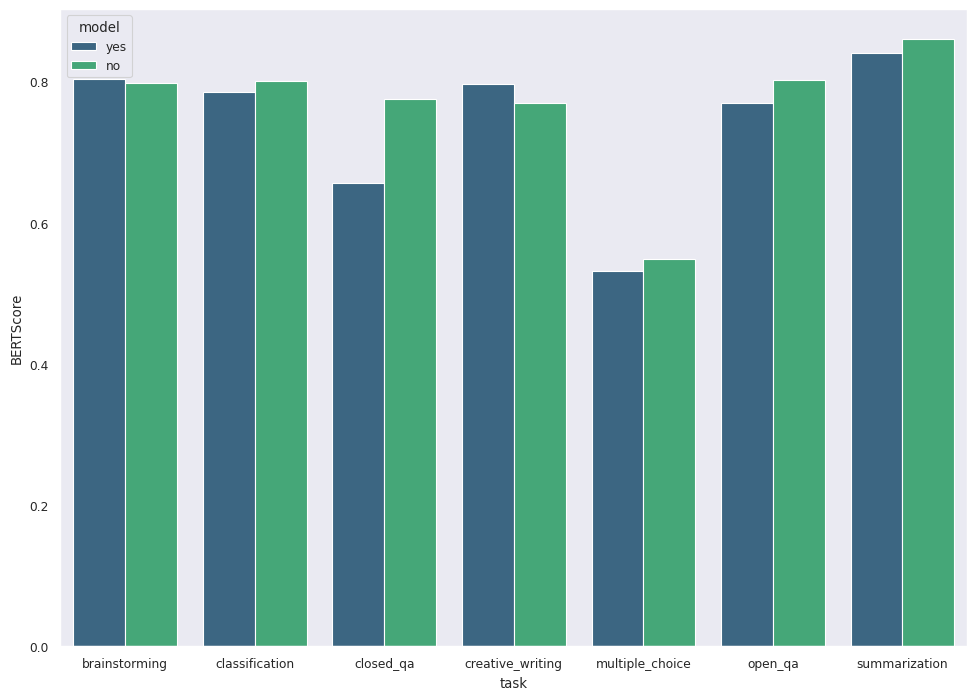

In [67]:
plot_bert_scores(eval_results, "llama3-typhoon-v1.5-8b")

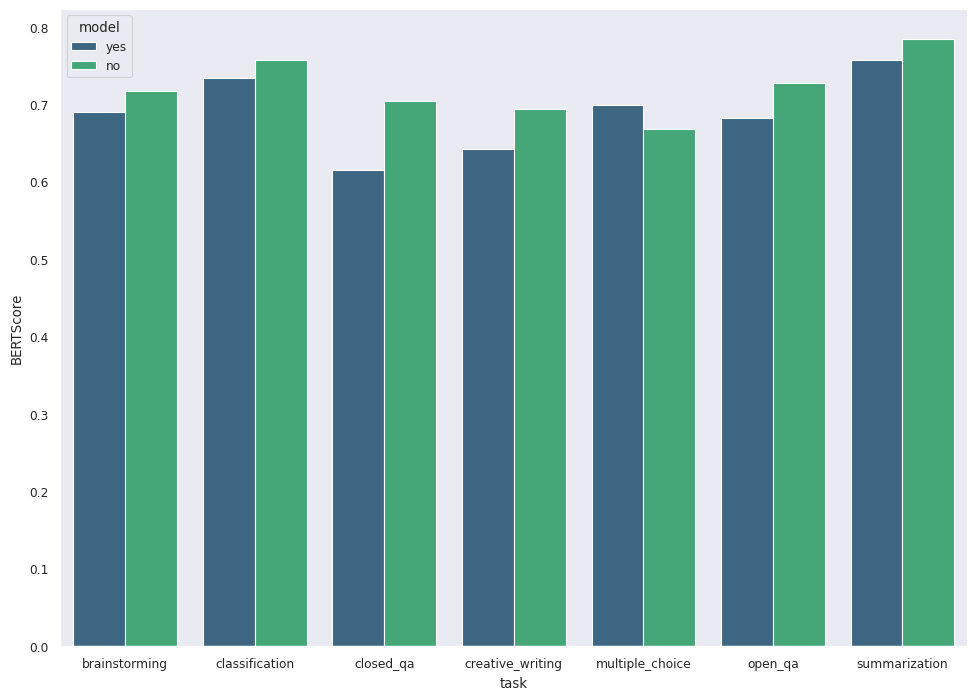

In [68]:
plot_bert_scores(eval_results, "llama3-wangchanx-demo")

In [98]:
# Plot head-to-head comparison
def plot_bert_scores_head_to_head(eval_results, model_name1, model_name2, save=False):
    sns.set_theme(style="dark")
    sns.set_context("paper", font_scale=1.05)
    # Set size of the plot to ACL half page size
    plt.figure(figsize=(5.5, 3.5))

    pallette = sns.color_palette("crest", n_colors=2)

    all_bert_scores = []
    for model in eval_results[model_name1]:
        for task in eval_results[model_name1][model]:
            for metric in eval_results[model_name1][model][task]:
                if metric == "BERTScore":
                    all_bert_scores.append({"task": task, "BERTScore": eval_results[model_name1][model][task][metric], "model": model, "model_name": model_name1})

    for model in eval_results[model_name2]:
        for task in eval_results[model_name2][model]:
            for metric in eval_results[model_name2][model][task]:
                if metric == "BERTScore":
                    all_bert_scores.append({"task": task, "BERTScore": eval_results[model_name2][model][task][metric], "model": model, "model_name": model_name2})

    all_bert_scores_df = pd.DataFrame(all_bert_scores)

    # Sort tasks by alphabetical order
    all_bert_scores_df = all_bert_scores_df.sort_values("task")

    # Beautify the task names
    task_to_name = {
        "brainstorming": "Brainstorming",
        "classification": "Classification",
        "closed_qa": "Closed QA",
        "creative_writing": "Creative Writing",
        "multiple_choice": "Multiple Choice",
        "open_qa": "Open QA",
        "summarization": "Summarization"
    }

    all_bert_scores_df["task"] = all_bert_scores_df["task"].map(task_to_name)

    # Change model_names
    model_to_name = {
        "llama3_clsit": "F+ C+ D+",
        "llama3-typhoon-v1.5-8b": "Typhoon",
        "llama3-wangchanx-demo": "WangchanX"
    }

    all_bert_scores_df["model_name"] = all_bert_scores_df["model_name"].map(model_to_name)

    # Capitalize the legend
    all_bert_scores_df = all_bert_scores_df.rename(columns={"model_name": "Model Name"})
    all_bert_scores_df = all_bert_scores_df.rename(columns={"task": "Task"})

    # Bold the Axes
    plt.rcParams["axes.labelweight"] = "bold"

    sns.barplot(x="Task", y="BERTScore", hue="Model Name", data=all_bert_scores_df, palette=pallette)

    # Rotate the x-axis labels
    plt.xticks(rotation=35)

    # Remove x label
    plt.xlabel("")

    if save:
        plt.savefig(f"head_to_head_{model_name1}_{model_name2}.pdf", bbox_inches='tight')

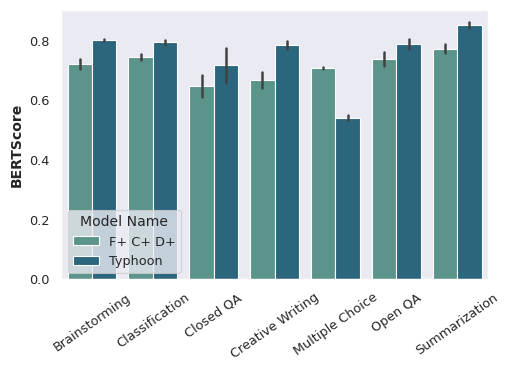

In [99]:
plot_bert_scores_head_to_head(eval_results, "llama3_clsit", "llama3-typhoon-v1.5-8b", save=True)

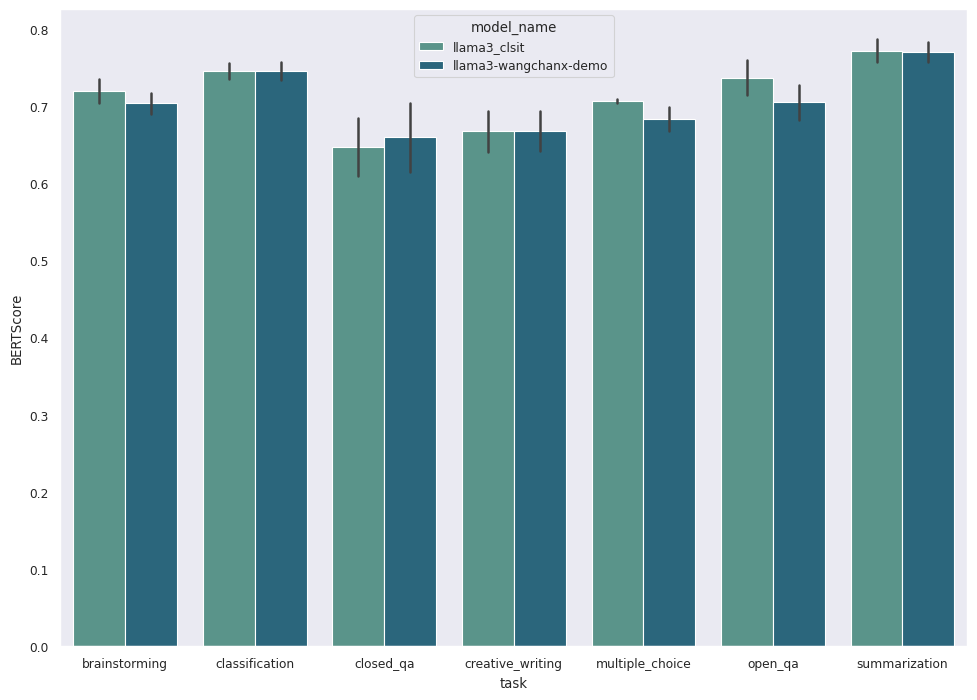

In [71]:
plot_bert_scores_head_to_head(eval_results, "llama3_clsit", "llama3-wangchanx-demo")

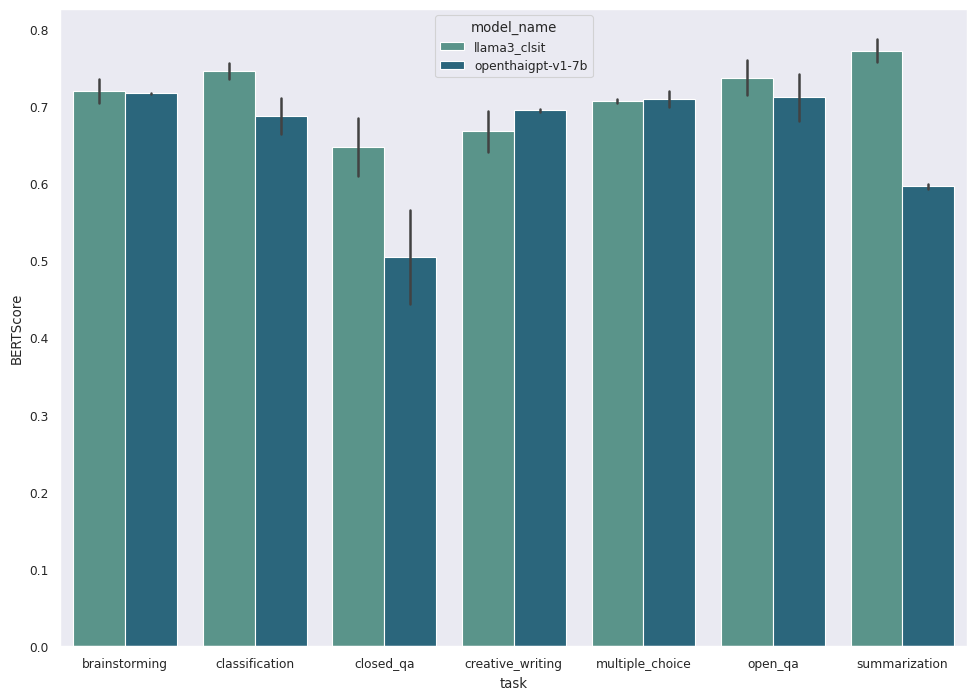

In [72]:
plot_bert_scores_head_to_head(eval_results, "llama3_clsit", "openthaigpt-v1-7b")

# LLM-As-A-Judge

In [126]:
judge_results_opt = pd.read_csv("llm_judgement_llama3_clsit_vs_openthaigpt-v1-7b.csv")
judge_results_wangchanx = pd.read_csv("llm_judgement_llama3_clsit_vs_llama3-wangchanx-demo.csv")

judge_results_opt = judge_results_opt[judge_results_opt["match"] != "error"].copy()
judge_results_wangchanx = judge_results_wangchanx[judge_results_wangchanx["match"] != "error"].copy()

print("CLSIT vs OpenThaiGPT")
print(judge_results_opt["match"].value_counts(normalize=True))
print("CLSIT vs WangchanX")
print(judge_results_wangchanx["match"].value_counts(normalize=True))

CLSIT vs OpenThaiGPT
A      0.595018
B      0.386671
tie    0.018311
Name: match, dtype: float64
CLSIT vs WangchanX
Series([], Name: match, dtype: float64)


In [127]:
pd.read_csv("llm_judgement_llama3_clsit_vs_llama3-wangchanx-demo.csv")

,question_a,context_a,answer_a,id,prediction_a,task_a,is_culture_a,question_b,context_b,answer_b,prediction_b,task_b,is_culture_b,judgement,match
0,The Sandbox มีโมเดลธุรกิจอย่างไร? อะไรคือกลไกห...,NaN,โมเดลธุรกิจ:\n\nThe Sandbox มีโมเดลธุรกิจที่ขั...,3df7e721c4f80bd471f0208e24ca40a52512a9e7830581...,The Sandbox เป็นแพลตฟอร์มสำหรับการสร้างและเปิด...,brainstorming,no,The Sandbox มีโมเดลธุรกิจอย่างไร? อะไรคือกลไกห...,NaN,โมเดลธุรกิจ:\n\nThe Sandbox มีโมเดลธุรกิจที่ขั...,The Sandbox เป็นแพลตฟอร์มบล็อกเชนสำหรับการสร้า...,brainstorming,no,Error code: 429 - {'error': {'message': 'You e...,error
1,ในมุมมองของ ดร. จิติพล พฤกษาเมธานันท์ อะไรคือก...,NaN,กลยุทธ์การลงทุนที่เหมาะสมในช่วง Doctor Markets...,89c4df4779c6cdf1d3d659505f1312240f796039f9cbfc...,"ในขณะนี้ การใช้วิธีการ ""หุ้นกองทุ๊"" เพื่อกระจา...",brainstorming,no,ในมุมมองของ ดร. จิติพล พฤกษาเมธานันท์ อะไรคือก...,NaN,กลยุทธ์การลงทุนที่เหมาะสมในช่วง Doctor Markets...,นักลงทุนสามารถใช้สินทรัพย์ที่มีระดับความผันผวน...,brainstorming,no,Error code: 429 - {'error': {'message': 'You e...,error
2,บทเรียนจากวิกฤตศรีลังกา: อะไรคือสิ่งที่นักลงทุ...,NaN,วิกฤตเศรษฐกิจของศรีลังกากำลังส่งผลกระทบต่อประช...,7d6793452ada0e797c022541b9b54b186c9ac57fce98be...,นักลงทุนทุกคนควรระวังสินกับปัจจัยเสี่ยงและความ...,brainstorming,no,บทเรียนจากวิกฤตศรีลังกา: อะไรคือสิ่งที่นักลงทุ...,NaN,วิกฤตเศรษฐกิจของศรีลังกากำลังส่งผลกระทบต่อประช...,การรุกรานของทหารอินเดียในศรีลังกาส่งผลกระทบอย่...,brainstorming,no,Error code: 429 - {'error': {'message': 'You e...,error
3,ในฐานะนักลงทุน เราควรพิจารณา ESG ในการลงทุนอย่...,NaN,การพิจารณา ESG ในการลงทุนเป็นสิ่งสำคัญ ดังนี้:...,576e4a3f4e4b829a7b1bcb853145df7f099e2f48e89ee6...,ในฐานะนักลงทุน เราควรให้ความสำคัญกับการวิเคราะ...,brainstorming,no,ในฐานะนักลงทุน เราควรพิจารณา ESG ในการลงทุนอย่...,NaN,การพิจารณา ESG ในการลงทุนเป็นสิ่งสำคัญ ดังนี้:...,ESG เป็นคำย่อที่ใช้เรียกหลักเกณฑ์ทางสังคม การเ...,brainstorming,no,Error code: 429 - {'error': {'message': 'You e...,error
4,จากโมเดลธุรกิจของประเทศหลัก ๆ ในโลกหลังสงคราม ...,NaN,โอกาสและความเสี่ยงทางการเงินสำหรับนักลงทุนในแต...,364f9fe8062a4bd9ad2c528da3e977a6cb0a6d4ab8c17b...,จากการศึกษาแบบละเอียดถึงการดำเนินเศรษฐกิจและกา...,brainstorming,no,จากโมเดลธุรกิจของประเทศหลัก ๆ ในโลกหลังสงคราม ...,NaN,โอกาสและความเสี่ยงทางการเงินสำหรับนักลงทุนในแต...,ต่อไปนี้คือข้อเสนอทั่วไปเกี่ยวกับแนวโน้มการเปล...,brainstorming,no,Error code: 429 - {'error': {'message': 'You e...,error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,จงสรุปบทความ สรรพคุณทางยาของปีบตามตำราแพทย์แผนไทย,ปีบ ราชินีจากป่าภาคตะวันตก ปีบ ราชินีจากป่าภาค...,ปีบมีชื่อทางวิทยาศาสตร์ว่า Millingtonia horten...,9c0b47779f53426eab68fe4d7ca6cc1b2e43a67cca1337...,บทความนี้กล่าวถึงสรพคุณทางยาของปีบ ซึ่งเป็นต้น...,summarization,yes,จงสรุปบทความ สรรพคุณทางยาของปีบตามตำราแพทย์แผนไทย,ปีบ ราชินีจากป่าภาคตะวันตก ปีบ ราชินีจากป่าภาค...,ปีบมีชื่อทางวิทยาศาสตร์ว่า Millingtonia horten...,ปีบมีสรรพคุณทางยาหลายอย่าง เช่น ดอกปีบสามารถใช...,summarization,yes,Error code: 429 - {'error': {'message': 'You e...,error
6204,จงสรุปบทความ สรรพคุณทางยาของกาหลาตามตำราแพทย์แ...,กาหลา งดงาม เรียบง่าย และทนทาน ปานสิ่งประดิษฐ์...,กาหลาเป็นไม้ล้มลุก มีชื่อวิทยาศาสตร์ว่า Amomum...,c238c97810e5952301f2de8fb5c172242848c32a7aa9a1...,กาหลาเป็นไม้ล้มลุกที่มีประโยชน์ต่อสุขภาพและการ...,summarization,yes,จงสรุปบทความ สรรพคุณทางยาของกาหลาตามตำราแพทย์แ...,กาหลา งดงาม เรียบง่าย และทนทาน ปานสิ่งประดิษฐ์...,กาหลาเป็นไม้ล้มลุก มีชื่อวิทยาศาสตร์ว่า Amomum...,กาหลา (Amomum magnifica) เป็นพืชในสกุล Amomum ...,summarization,yes,Error code: 429 - {'error': {'message': 'You e...,error
6205,"จงสรุปบทความเรื่อง ""เดินทางของหัวใจ: ประสบการณ...",หัวใจของเราตอนจบ เรื่องนี้เขียนจากประสบการณ์เพ...,เรื่องนี้เล่าถึงประสบการณ์การผ่าตัดหัวใจของผู้...,7c363d13d20628ab092132aa21b8f3fbc6172f17485d9f...,บทความนี้เล่าถึงประสบการณ์ของผู้เขียนในการผ่าต...,summarization,yes,"จงสรุปบทความเรื่อง ""เดินทางของหัวใจ: ประสบการณ...",หัวใจของเราตอนจบ เรื่องนี้เขียนจากประสบการณ์เพ...,เรื่องนี้เล่าถึงประสบการณ์การผ่าตัดหัวใจของผู้...,เดินทางของหัว

# Average Generation Lengths

In [27]:
# Compute average generation length
import glob
def load_all_csvs(dir):
    all_csvs = glob.glob(f"{dir}/*.csv")
    all_dfs = []
    for csv in all_csvs:
        df = pd.read_csv(csv)
        all_dfs.append(df)
    return pd.concat(all_dfs)

clsit = load_all_csvs("llama3_clsit")
openthaigpt = load_all_csvs("openthaigpt-v1-7b")
typhoon = load_all_csvs("llama3-typhoon-v1.5-8b")
wangchanx = load_all_csvs("llama3-wangchanx-demo")

In [28]:
# Get average generation length
clsit["prediction"].str.len().mean()

232.98501932989691

In [29]:
typhoon["prediction"].str.len().mean()

500.77999677886936

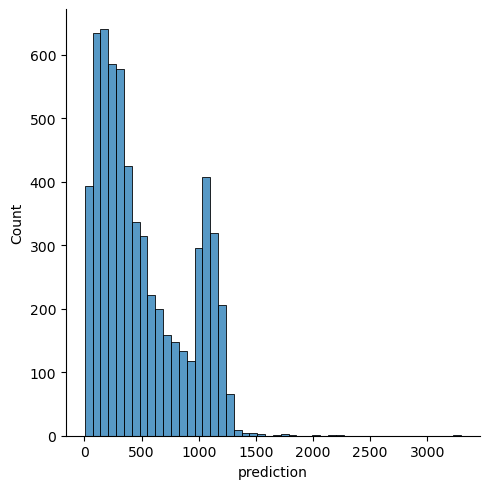

In [37]:
sns.displot(wangchanx["prediction"].str.len())

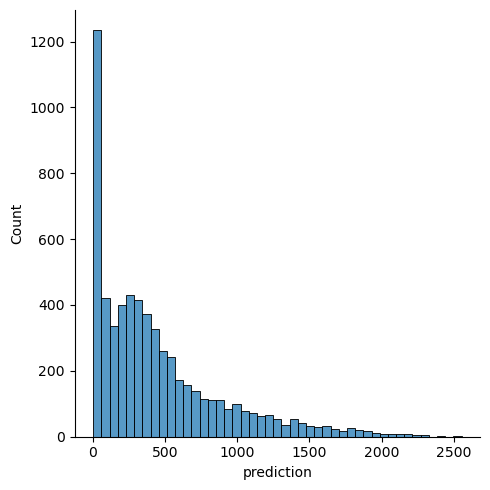

In [35]:
sns.displot(openthaigpt["prediction"].str.len())

CLSIT: [342.0, 309.0, 203.0, 205.0, 317.0, 361.0, 244.0, 294.0, 229.0, 274.0, 202.0, 271.0, 335.0, 315.0, 235.0, 306.0, 350.0, 224.0, 189.0, 359.0, 351.0, 321.0, 291.0, 279.0, 202.0, 301.0, 202.0, 239.0, 272.0, 324.0, 175.0, 253.0, 253.0, 357.0, 127.0, 251.0, 225.0, 281.0, 287.0, 210.0, 233.0, 196.0, 209.0, 196.0, 252.0, 465.0, 225.0, 231.0, 359.0, 292.0, 274.0, 304.0, 225.0, 188.0, 192.0, 269.0, 299.0, 327.0, 244.0, 201.0, 167.0, 279.0, 387.0, 284.0, 218.0, 227.0, 336.0, 146.0, 244.0, 250.0, 172.0, 282.0, 356.0, 243.0, 297.0, 232.0, 292.0, 259.0, 306.0, 182.0, 376.0, 282.0, 154.0, 259.0, 233.0, 294.0, 311.0, 245.0, 245.0, 267.0, 300.0, 235.0, 203.0, 139.0, 298.0, 349.0, 312.0, 223.0, 227.0, 229.0, 339.0, 314.0, 274.0, 242.0, 274.0, 256.0, 237.0, 294.0, 285.0, 147.0, 155.0, 260.0, 243.0, 334.0, 298.0, 212.0, 212.0, 267.0, 336.0, 264.0, 457.0, 252.0, 239.0, 277.0, 290.0, 296.0, 292.0, 376.0, 254.0, 265.0, 360.0, 217.0, 303.0, 231.0, 191.0, 267.0, 166.0, 181.0, 254.0, 217.0, 193.0, 317.0

/tmp/ipykernel_238234/55658434.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="generation_length", data=all_generation_lengths_df , palette=pallette)


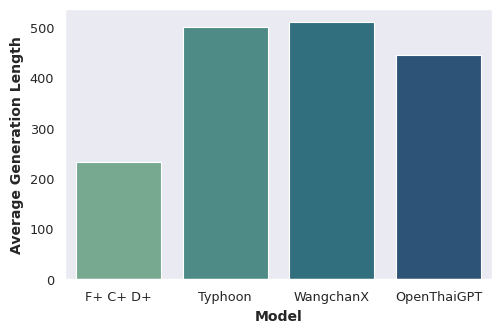

In [68]:
from scipy import stats

# Plot generation length
def plot_generation_length(clsit, typhoon, wangchanx, openthaigpt):
    sns.set_theme(style="dark")
    sns.set_context("paper", font_scale=1.05)
    # Set size of the plot to ACL half page size
    plt.figure(figsize=(5.5, 3.5))

    pallette = sns.color_palette("crest", n_colors=4)

    all_generation_lengths = []
    for model, df in zip(["F+ C+ D+", "Typhoon", "WangchanX", "OpenThaiGPT"], [clsit, typhoon, wangchanx, openthaigpt]):
        all_generation_lengths.append({"Model": model, "generation_length": df["prediction"].str.len().mean()})

    all_generation_lengths_df = pd.DataFrame(all_generation_lengths)

    sns.barplot(x="Model", y="generation_length", data=all_generation_lengths_df , palette=pallette)

    clsit_lengths = clsit["prediction"].str.len().dropna().to_list()
    typhoon_lengths = typhoon["prediction"].str.len().dropna().to_list()
    print(f"CLSIT: {clsit_lengths}")

    # Perform t-test
    t_stat, p_val = stats.ttest_ind(clsit_lengths, typhoon_lengths, equal_var=False)
    print(f"CLSIT vs Typhoon: t-statistic: {t_stat}, p-value: {p_val}")

    # Perform Wilcoxon rank-sum test
    wilcoxon_stat, wilcoxon_p_value = stats.ranksums(clsit_lengths, typhoon_lengths)
    print(f"Wilcoxon rank-sum test: statistic = {wilcoxon_stat:.3f}, p-value = {wilcoxon_p_value:.7f}")


    # Bold the Axes
    plt.rcParams["axes.labelweight"] = "bold"

    plt.ylabel("Average Generation Length")

    plt.savefig("generation_length.pdf", bbox_inches='tight')

plot_generation_length(clsit, typhoon, wangchanx, openthaigpt)

In [53]:
# Get bert sim
import json

bert_sim = json.load(open("bert_sims.json"))
bert_sim

{'llama3_clsit': {'yes': {'brainstorming': [0.6639512777328491,
    0.7749378681182861,
    0.704297661781311,
    0.6905603408813477,
    0.679375410079956,
    0.7859605550765991,
    0.7744700908660889,
    0.9201050400733948,
    0.7726263999938965,
    0.8522565960884094,
    0.5965654850006104,
    0.4617375433444977,
    0.8535976409912109,
    0.3988134264945984,
    0.7325330972671509,
    0.5566961765289307,
    0.6296229362487793,
    0.7241508364677429,
    0.7205507159233093,
    0.640575110912323,
    0.3468042016029358,
    0.828057050704956,
    0.5363180637359619,
    0.793848991394043,
    0.5683521032333374,
    0.8307986259460449,
    0.652837336063385,
    0.754462718963623,
    0.7156475186347961,
    0.7565708756446838,
    0.5453572273254395,
    0.7207082509994507,
    0.8730103969573975,
    0.7246586084365845,
    0.8384547829627991,
    0.6138663291931152,
    0.7543662786483765,
    0.85048907995224,
    0.764261782169342,
    0.6688119173049927,
    0.6432

In [66]:
# Perform pairwise t-test
def perform_t_test(model1, model2):
    model1_sims = bert_sim[model1]
    model2_sims = bert_sim[model2]

    variant = ["yes", "no"]
    p_values = []
    wilcoxon_stats = []
    for var in variant:
        for task in model1_sims[var]:
            # t_stat, p_val = stats.ttest_ind(model1_sims[var][task], model2_sims[var][task], equal_var=False)
            # print(f"{model1} vs {model2} ({var}): {task}: t-statistic: {t_stat}, p-value: {p_val}")

            # Use wilcoxon rank-sum test
            wilcoxon_stat, wilcoxon_p_value = stats.ranksums(model1_sims[var][task], model2_sims[var][task])
            print(f"{model1} vs {model2} ({var}): {task}: statistic = {wilcoxon_stat:.3f}, p-value = {wilcoxon_p_value:.7f}")
            p_values.append(wilcoxon_p_value)
            wilcoxon_stats.append(wilcoxon_stat)

    print(f"Average Wilcoxon statistic: {sum(wilcoxon_stats) / len(wilcoxon_stats)}")
    print(f"Average p-value: {sum(p_values) / len(p_values)}")

In [67]:
perform_t_test("llama3_clsit", "llama3-typhoon-v1.5-8b")

llama3_clsit vs llama3-typhoon-v1.5-8b (yes): brainstorming: statistic = -4.232, p-value = 0.0000231
llama3_clsit vs llama3-typhoon-v1.5-8b (yes): creative_writing: statistic = -2.570, p-value = 0.0101652
llama3_clsit vs llama3-typhoon-v1.5-8b (yes): multiple_choice: statistic = 9.469, p-value = 0.0000000
llama3_clsit vs llama3-typhoon-v1.5-8b (yes): closed_qa: statistic = -4.601, p-value = 0.0000042
llama3_clsit vs llama3-typhoon-v1.5-8b (yes): classification: statistic = -5.164, p-value = 0.0000002
llama3_clsit vs llama3-typhoon-v1.5-8b (yes): open_qa: statistic = -9.938, p-value = 0.0000000
llama3_clsit vs llama3-typhoon-v1.5-8b (yes): summarization: statistic = -20.549, p-value = 0.0000000
llama3_clsit vs llama3-typhoon-v1.5-8b (no): creative_writing: statistic = -5.841, p-value = 0.0000000
llama3_clsit vs llama3-typhoon-v1.5-8b (no): closed_qa: statistic = -9.496, p-value = 0.0000000
llama3_clsit vs llama3-typhoon-v1.5-8b (no): multiple_choice: statistic = 13.251, p-value = 0.0000

# LLM Judge

In [5]:
llms = ["llama3_clsit", "llama3-typhoon-v1.5-8b", "openthaigpt-v1-7b"]

In [15]:
def plot_judge_results(model1, model2, base_dir="llm_judge/gemma-7b"):
    judge_results1 = pd.read_csv(f"{base_dir}/llm_judgement_{model1}_vs_{model2}.csv")
    judge_results2 = pd.read_csv(f"{base_dir}/llm_judgement_{model2}_vs_{model1}.csv")

    judge_results1 = judge_results1[judge_results1["match"] != "error"].copy()
    judge_results2 = judge_results2[judge_results2["match"] != "error"].copy()

    # Map results 2 to results 1
    result2_to_1 = {
        "A": "B",
        "B": "A",
        "Tie": "Tie"
    }
    judge_results2["match"] = judge_results2["match"].map(result2_to_1)

    # Merge on id
    judge_results = pd.merge(judge_results1, judge_results2, on="id", how="inner", suffixes=("_1", "_2"))
    
    # Check the results
    final_results = []
    for index, row in judge_results.iterrows():
        if row["match_1"] == row["match_2"]:
            final_results.append(row["match_1"])
        elif row["match_1"] == "Tie" and row["match_2"] != "Tie":
            final_results.append(row["match_2"])
        elif row["match_2"] == "Tie" and row["match_1"] != "Tie":
            final_results.append(row["match_1"])
        elif row["match_1"] == "A" and row["match_2"] == "B":
            final_results.append("Tie")
        elif row["match_1"] == "B" and row["match_2"] == "A":
            final_results.append("Tie")
        else:
            final_results.append("Tie")
    
    judge_results["final_result"] = final_results

    # Plot the results based on task
    for task in judge_results["task_a_1"].unique():
        task_results = judge_results[judge_results["task_a_1"] == task]
        print(f"Task: {task}")
        print(task_results["final_result"].value_counts(normalize=True))


In [16]:
plot_judge_results("llama3_clsit", "llama3-typhoon-v1.5-8b")

Task: brainstorming
B      0.804296
Tie    0.121718
A      0.073986
Name: final_result, dtype: float64
Task: classification
B      0.585438
A      0.212481
Tie    0.202080
Name: final_result, dtype: float64
Task: closed
B      0.827586
Tie    0.129973
A      0.042440
Name: final_result, dtype: float64
Task: creative
B      0.912281
Tie    0.043860
A      0.043860
Name: final_result, dtype: float64
Task: multiple
A      0.793173
B      0.106426
Tie    0.100402
Name: final_result, dtype: float64
Task: open
B      0.680878
Tie    0.176176
A      0.142947
Name: final_result, dtype: float64
Task: summarization
B      0.920127
Tie    0.052195
A      0.027679
Name: final_result, dtype: float64


In [9]:
plot_judge_results("llama3_clsit", "llama3-wangchanx-demo")

B      0.586690
A      0.252498
Tie    0.160812
Name: final_result, dtype: float64


In [17]:
plot_judge_results("llama3_clsit", "openthaigpt-v1-7b")

Task: brainstorming
B      0.715990
A      0.181384
Tie    0.102625
Name: final_result, dtype: float64
Task: classification
B      0.560178
A      0.280832
Tie    0.158990
Name: final_result, dtype: float64
Task: closed
A      0.566952
B      0.319088
Tie    0.113960
Name: final_result, dtype: float64
Task: creative
B      0.807018
A      0.114035
Tie    0.078947
Name: final_result, dtype: float64
Task: multiple
B      0.647887
A      0.241449
Tie    0.110664
Name: final_result, dtype: float64
Task: open
B      0.637618
A      0.203135
Tie    0.159248
Name: final_result, dtype: float64
Task: summarization
A      0.518563
B      0.379242
Tie    0.102196
Name: final_result, dtype: float64


In [22]:
gpt4o_judge = pd.read_csv("llm_judge/gpt4o/llm_judgement_llama3_clsit_vs_openthaigpt-v1-7b.csv")
gpt4o_judge["match"].value_counts(normalize=True)

A        0.586790
B        0.381324
tie      0.018058
error    0.013828
Name: match, dtype: float64

In [23]:
# Per task
for task in gpt4o_judge["task_a"].unique():
    task_results = gpt4o_judge[gpt4o_judge["task_a"] == task]
    print(f"Task: {task}")
    print(task_results["match"].value_counts(normalize=True))

Task: brainstorming
B      0.599045
A      0.396181
tie    0.004773
Name: match, dtype: float64
Task: classification
A        0.521545
B        0.429421
tie      0.029718
error    0.019316
Name: match, dtype: float64
Task: closed
A      0.729345
B      0.236467
tie    0.034188
Name: match, dtype: float64
Task: creative
B      0.649123
A      0.342105
tie    0.008772
Name: match, dtype: float64
Task: multiple
A        0.582329
B        0.357430
error    0.032129
tie      0.028112
Name: match, dtype: float64
Task: open
B        0.547962
A        0.390596
error    0.035110
tie      0.026332
Name: match, dtype: float64
Task: summarization
A      0.753704
B      0.238286
tie    0.008010
Name: match, dtype: float64


In [25]:
# llama3 judge
llama3_judge = pd.read_csv("llm_judge/llama3-8b/llm_judgement_llama3_clsit_vs_openthaigpt-v1-7b.csv")
llama3_judge["match"].value_counts(normalize=True)

B        0.654797
A        0.318211
error    0.020488
tie      0.006504
Name: match, dtype: float64